In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PerdigaoObservations import read_Sondes

In [2]:
# Location of observations:
obs_dir = '/glade/p/mmm/nmmm0058/oncley/Perdigao/radiosondes/'

# List of tests for different formats:
test_day_formats = [[pd.to_datetime('2017-05-23')],
                    pd.to_datetime('2017-05-23'),
                    np.asarray([pd.to_datetime('2017-05-23')]),
                    '2017-05-23',
                    ['2017-05-22','2017-05-24'],
                    pd.date_range('2017-04-23','2017-06-23',freq='15d')]

# Loop through test formats to make sure the code works for a variety of types:
for test_day in test_day_formats:
    test_failed = False
    try:
        test = read_Sondes(obs_dir,test_day)
    except:
        test_failed = True
    if not test_failed:
        print('Test passed for input: {}'.format(test_day))
    else:
        print('FAIL')


/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):


Test passed for input: [Timestamp('2017-05-23 00:00:00')]
Test passed for input: 2017-05-23 00:00:00
Test passed for input: [Timestamp('2017-05-23 00:00:00')]
Test passed for input: 2017-05-23


/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):
/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):
/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):
/

Test passed for input: ['2017-05-22', '2017-05-24']
No data found for 2017-04-23 00:00:00


/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):
/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):


No data found for 2017-06-22 00:00:00
Test passed for input: DatetimeIndex(['2017-04-23', '2017-05-08', '2017-05-23', '2017-06-07',
               '2017-06-22'],
              dtype='datetime64[ns]', freq='15D')


/glade/u/home/hawbecke/Code/Python/NCAR-Boundary_Layer/Perdigao/PerdigaoObservations.py:28: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if (type(day_of_interest) is not pd.datetime) or (type(day_of_interest) is not pd.Timestamp):


# Sonde Plotting Example:

In [3]:
# Get sonde of interest:
obs_sondes = read_Sondes(obs_dir,'2017-05-23')

In [4]:
from metpy.plots import SkewT

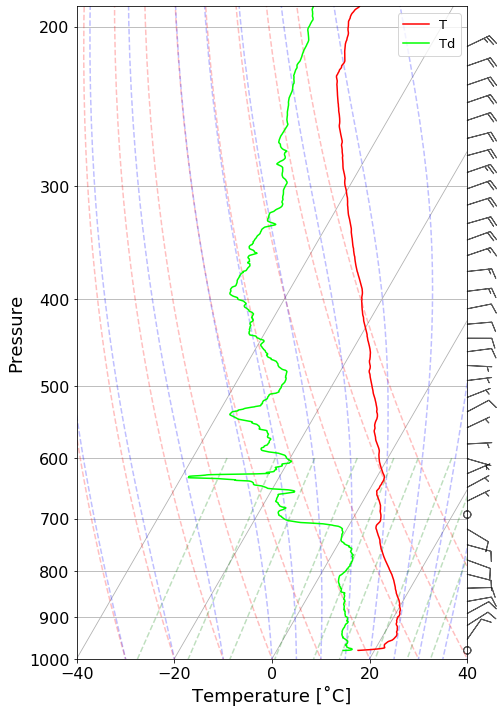

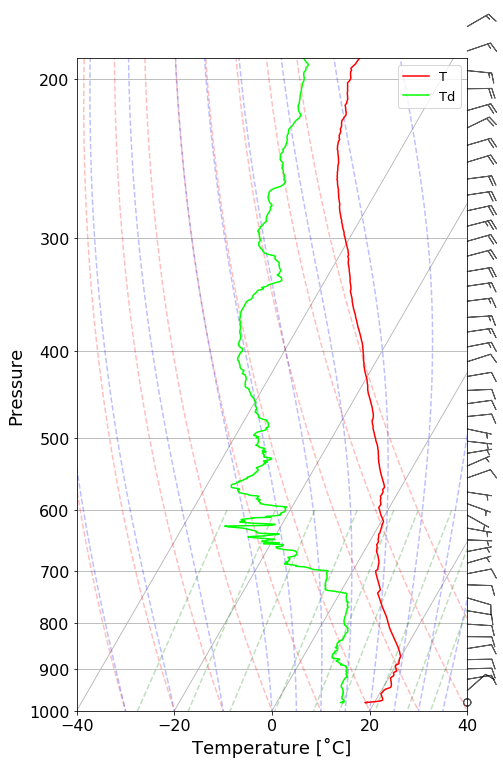

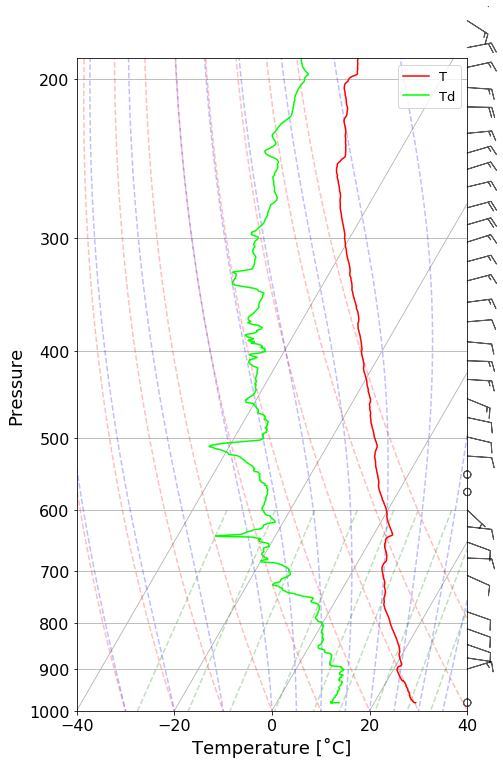

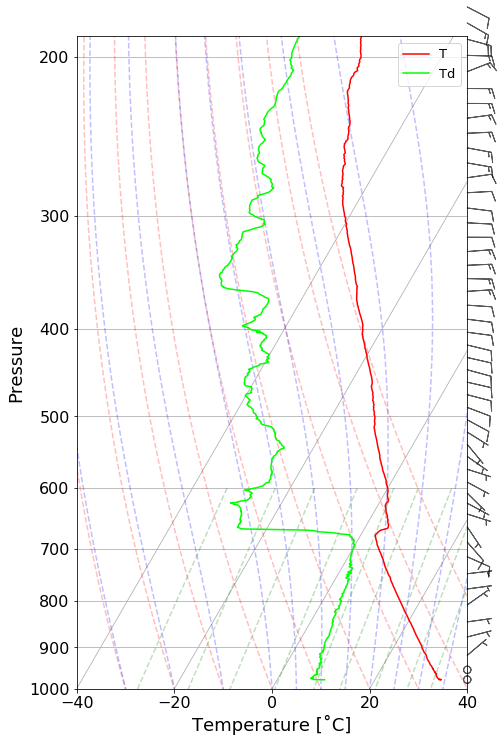

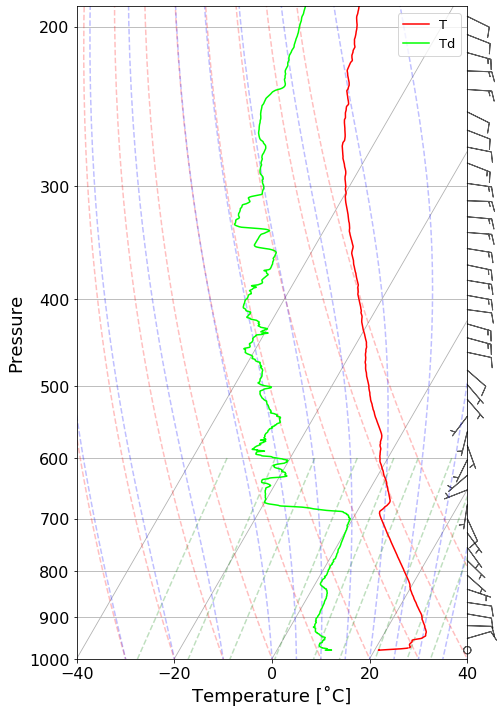

In [5]:
barb_s = 0
barb_e = -800
barb_int = 60

for obs_time in obs_sondes:
    fig = plt.figure(figsize=(7,12))
    skewT_plt = {}
    skew = SkewT(fig=fig,subplot=111)

    obs_times = []
    obs_p = obs_sondes[obs_time].pres
    obsT_label  = 'T'
    obsTd_label = 'Td'

    obs = obs_sondes[obs_time]
    
    obs_p = obs.pres
    obs_T = obs.tdry
    obs_Td = obs.dp
    obs_u = obs.u_wind
    obs_v = obs.v_wind

    skew.plot(obs_p, obs_T, 'r',label=obsT_label)
    skew.plot(obs_p, obs_Td, 'lime',label=obsTd_label)

    nheights = len(obs_p[barb_s:barb_e:barb_int])
    barb_colors = list(['b']*nheights)
    skew.plot_barbs(obs_p[barb_s:barb_e:barb_int], 
                    obs_u[barb_s:barb_e:barb_int], 
                    obs_v[barb_s:barb_e:barb_int],
                    alpha=0.65)


    skew.plot_dry_adiabats(alpha=0.25)
    skew.plot_moist_adiabats(alpha=0.25)
    skew.plot_mixing_lines(alpha=0.25)
    skew.ax.set_ylim(1000, 190)
    skew.ax.set_ylabel('Pressure',size=18)
    skew.ax.set_xlabel('Temperature [˚C]',size=18)
    skew.ax.set_xlim(-40,40)
    plt.tick_params(labelsize=16)
    plt.xticks(np.arange(-40,41,20))
    plt.legend(frameon=True,fontsize=13)
    plt.show()
    